In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  
%run -i /home/cz136/project/sa/lib/src/corr_func.py  

In [4]:
# z_diff=float(z_diff)

In [5]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [6]:
if vol!="uber":
    members=shapes

In [7]:
if quantile!="":
    i=int(quantile)

In [8]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [9]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [10]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [11]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [12]:
NBINS=10

In [13]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [14]:
len(shapes)

36741

In [15]:
len(members)

36741

In [16]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [17]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

22it [00:00, 209.61it/s]

45it [00:00, 213.84it/s]

68it [00:00, 216.97it/s]

91it [00:00, 218.65it/s]

114it [00:00, 219.37it/s]

137it [00:00, 221.16it/s]

159it [00:00, 218.19it/s]

180it [00:00, 208.08it/s]

200it [00:00, 201.18it/s]

223it [00:01, 207.97it/s]

244it [00:01, 207.85it/s]

267it [00:01, 213.84it/s]

291it [00:01, 218.89it/s]

315it [00:01, 223.13it/s]

339it [00:01, 225.86it/s]

362it [00:01, 219.96it/s]

386it [00:01, 224.88it/s]

410it [00:01, 228.49it/s]

434it [00:01, 231.24it/s]

458it [00:02, 233.01it/s]

482it [00:02, 234.34it/s]

506it [00:02, 234.82it/s]

530it [00:02, 234.52it/s]

554it [00:02, 234.09it/s]

578it [00:02, 234.01it/s]

602it [00:02, 234.19it/s]

626it [00:02, 233.99it/s]

650it [00:02, 227.76it/s]

673it [00:03, 224.83it/s]

697it [00:03, 227.58it/s]

720it [00:03, 227.29it/s]

744it [00:03, 230.22it/s]

768it [00:03, 232.37it/s]

792it [00:03, 234.31it/s]

817it [00:03, 236.06it/s]

842it [00:03, 238.17it/s]

867it [00:03, 239.19it/s]

892it [00:03, 239.69it/s]

917it [00:04, 240.61it/s]

942it [00:04, 241.09it/s]

967it [00:04, 240.85it/s]

992it [00:04, 241.45it/s]

1017it [00:04, 240.55it/s]

1042it [00:04, 237.70it/s]

1066it [00:04, 236.35it/s]

1090it [00:04, 235.65it/s]

1114it [00:04, 234.23it/s]

1138it [00:04, 234.07it/s]

1162it [00:05, 235.00it/s]

1186it [00:05, 234.24it/s]

1210it [00:05, 235.34it/s]

1234it [00:05, 235.08it/s]

1258it [00:05, 234.61it/s]

1282it [00:05, 234.23it/s]

1306it [00:05, 234.10it/s]

1330it [00:05, 234.95it/s]

1354it [00:05, 236.28it/s]

1378it [00:06, 220.97it/s]

1401it [00:06, 221.16it/s]

1425it [00:06, 224.68it/s]

1449it [00:06, 228.29it/s]

1473it [00:06, 230.41it/s]

1497it [00:06, 231.63it/s]

1521it [00:06, 225.37it/s]

1545it [00:06, 228.21it/s]

1569it [00:06, 230.21it/s]

1593it [00:06, 232.07it/s]

1617it [00:07, 234.13it/s]

1641it [00:07, 234.86it/s]

1665it [00:07, 235.61it/s]

1689it [00:07, 236.27it/s]

1713it [00:07, 237.35it/s]

1738it [00:07, 238.13it/s]

1763it [00:07, 239.97it/s]

1788it [00:07, 240.26it/s]

1813it [00:07, 240.64it/s]

1838it [00:07, 241.11it/s]

1863it [00:08, 242.78it/s]

1888it [00:08, 243.88it/s]

1913it [00:08, 241.83it/s]

1938it [00:08, 241.92it/s]

1963it [00:08, 241.76it/s]

1988it [00:08, 241.29it/s]

2013it [00:08, 241.75it/s]

2038it [00:08, 242.63it/s]

2063it [00:08, 242.66it/s]

2088it [00:08, 242.11it/s]

2113it [00:09, 236.99it/s]

2137it [00:09, 220.13it/s]

2160it [00:09, 213.90it/s]

2182it [00:09, 212.45it/s]

2204it [00:09, 214.52it/s]

2229it [00:09, 222.82it/s]

2254it [00:09, 229.28it/s]

2279it [00:09, 232.63it/s]

2303it [00:09, 234.26it/s]

2328it [00:10, 237.45it/s]

2353it [00:10, 239.29it/s]

2378it [00:10, 239.88it/s]

2403it [00:10, 239.93it/s]

2428it [00:10, 239.36it/s]

2453it [00:10, 240.63it/s]

2478it [00:10, 240.29it/s]

2503it [00:10, 241.47it/s]

2528it [00:10, 241.26it/s]

2553it [00:10, 241.43it/s]

2578it [00:11, 240.86it/s]

2603it [00:11, 241.35it/s]

2628it [00:11, 240.50it/s]

2653it [00:11, 240.99it/s]

2678it [00:11, 242.12it/s]

2703it [00:11, 241.92it/s]

2728it [00:11, 233.30it/s]

2753it [00:11, 235.99it/s]

2777it [00:11, 223.88it/s]

2800it [00:12, 225.43it/s]

2824it [00:12, 225.68it/s]

2847it [00:12, 212.26it/s]

2869it [00:12, 204.98it/s]

2890it [00:12, 200.00it/s]

2911it [00:12, 197.25it/s]

2931it [00:12, 194.77it/s]

2953it [00:12, 200.50it/s]

2976it [00:12, 207.78it/s]

2999it [00:13, 213.96it/s]

3023it [00:13, 219.34it/s]

3047it [00:13, 222.66it/s]

3071it [00:13, 225.53it/s]

3094it [00:13, 225.68it/s]

3117it [00:13, 223.63it/s]

3140it [00:13, 215.65it/s]

3162it [00:13, 211.25it/s]

3184it [00:13, 208.45it/s]

3205it [00:13, 205.62it/s]

3226it [00:14, 203.90it/s]

3247it [00:14, 202.12it/s]

3270it [00:14, 207.99it/s]

3295it [00:14, 211.64it/s]

3317it [00:14, 187.87it/s]

3337it [00:14, 189.15it/s]

3357it [00:14, 190.51it/s]

3377it [00:14, 191.99it/s]

3397it [00:14, 191.93it/s]

3420it [00:15, 199.80it/s]

3442it [00:15, 202.44it/s]

3463it [00:15, 197.18it/s]

3483it [00:15, 195.26it/s]

3503it [00:15, 188.14it/s]

3522it [00:15, 188.15it/s]

3541it [00:15, 187.63it/s]

3561it [00:15, 189.95it/s]

3584it [00:15, 200.05it/s]

3605it [00:16, 194.20it/s]

3628it [00:16, 202.91it/s]

3651it [00:16, 208.98it/s]

3674it [00:16, 214.30it/s]

3696it [00:16, 199.98it/s]

3717it [00:16, 195.18it/s]

3737it [00:16, 185.84it/s]

3757it [00:16, 189.19it/s]

3777it [00:16, 189.68it/s]

3797it [00:17, 191.13it/s]

3818it [00:17, 195.86it/s]

3841it [00:17, 204.83it/s]

3864it [00:17, 209.69it/s]

3887it [00:17, 215.33it/s]

3910it [00:17, 219.40it/s]

3934it [00:17, 222.45it/s]

3958it [00:17, 224.96it/s]

3982it [00:17, 228.09it/s]

4006it [00:17, 229.88it/s]

4030it [00:18, 230.06it/s]

4054it [00:18, 230.86it/s]

4078it [00:18, 231.80it/s]

4102it [00:18, 232.51it/s]

4126it [00:18, 227.81it/s]

4150it [00:18, 230.97it/s]

4175it [00:18, 234.52it/s]

4199it [00:18, 234.75it/s]

4224it [00:18, 236.66it/s]

4248it [00:18, 237.51it/s]

4272it [00:19, 237.61it/s]

4297it [00:19, 238.51it/s]

4322it [00:19, 239.70it/s]

4346it [00:19, 239.65it/s]

4370it [00:19, 238.79it/s]

4394it [00:19, 231.13it/s]

4418it [00:19, 232.45it/s]

4442it [00:19, 233.91it/s]

4466it [00:19, 234.65it/s]

4491it [00:19, 236.63it/s]

4515it [00:20, 237.32it/s]

4539it [00:20, 237.42it/s]

4563it [00:20, 238.17it/s]

4588it [00:20, 241.24it/s]

4613it [00:20, 232.49it/s]

4637it [00:20, 223.17it/s]

4660it [00:20, 224.25it/s]

4686it [00:20, 231.40it/s]

4712it [00:20, 236.71it/s]

4736it [00:21, 225.23it/s]

0it [00:00, ?it/s]

26it [00:00, 251.60it/s]

Number of empty sat catalogs is 175


52it [00:00, 251.29it/s]

77it [00:00, 250.67it/s]

102it [00:00, 250.44it/s]

125it [00:00, 241.01it/s]

150it [00:00, 242.24it/s]

176it [00:00, 245.59it/s]

199it [00:00, 240.42it/s]

225it [00:00, 244.25it/s]

251it [00:01, 247.39it/s]

277it [00:01, 248.72it/s]

303it [00:01, 249.83it/s]

329it [00:01, 251.53it/s]

355it [00:01, 251.30it/s]

381it [00:01, 252.22it/s]

407it [00:01, 252.29it/s]

433it [00:01, 253.01it/s]

459it [00:01, 251.90it/s]

485it [00:01, 243.00it/s]

510it [00:02, 244.84it/s]

535it [00:02, 239.98it/s]

560it [00:02, 227.20it/s]

583it [00:02, 224.16it/s]

608it [00:02, 229.33it/s]

632it [00:02, 231.82it/s]

657it [00:02, 235.64it/s]

682it [00:02, 238.60it/s]

706it [00:02, 238.50it/s]

730it [00:03, 237.90it/s]

754it [00:03, 238.05it/s]

778it [00:03, 238.00it/s]

802it [00:03, 237.24it/s]

826it [00:03, 237.36it/s]

850it [00:03, 236.75it/s]

874it [00:03, 220.18it/s]

897it [00:03, 214.70it/s]

919it [00:03, 210.88it/s]

941it [00:03, 206.06it/s]

962it [00:04, 201.88it/s]

983it [00:04, 197.12it/s]

1003it [00:04, 195.18it/s]

1023it [00:04, 195.00it/s]

1043it [00:04, 186.10it/s]

1064it [00:04, 190.29it/s]

1085it [00:04, 194.13it/s]

1106it [00:04, 196.84it/s]

1126it [00:04, 188.92it/s]

1146it [00:05, 189.98it/s]

1166it [00:05, 190.62it/s]

1186it [00:05, 189.95it/s]

1206it [00:05, 190.99it/s]

1226it [00:05, 191.48it/s]

1246it [00:05, 187.93it/s]

1266it [00:05, 190.93it/s]

1286it [00:05, 186.02it/s]

1306it [00:05, 189.91it/s]

1327it [00:06, 193.67it/s]

1348it [00:06, 196.88it/s]

1369it [00:06, 199.05it/s]

1394it [00:06, 210.46it/s]

1419it [00:06, 220.46it/s]

1444it [00:06, 227.96it/s]

1469it [00:06, 233.97it/s]

1493it [00:06, 231.88it/s]

1517it [00:06, 234.18it/s]

1542it [00:06, 237.02it/s]

1567it [00:07, 239.84it/s]

1592it [00:07, 242.61it/s]

1617it [00:07, 244.04it/s]

1642it [00:07, 242.98it/s]

1667it [00:07, 224.20it/s]

1690it [00:07, 215.13it/s]

1713it [00:07, 218.29it/s]

1738it [00:07, 226.56it/s]

1763it [00:07, 232.54it/s]

1788it [00:07, 236.89it/s]

1813it [00:08, 238.11it/s]

1838it [00:08, 240.51it/s]

1863it [00:08, 243.14it/s]

1888it [00:08, 245.15it/s]

1913it [00:08, 246.11it/s]

1938it [00:08, 246.25it/s]

1963it [00:08, 246.35it/s]

1988it [00:08, 246.29it/s]

2013it [00:08, 247.31it/s]

2039it [00:08, 248.35it/s]

2064it [00:09, 248.66it/s]

2089it [00:09, 248.61it/s]

2114it [00:09, 248.69it/s]

2139it [00:09, 235.43it/s]

2165it [00:09, 239.77it/s]

2190it [00:09, 174.79it/s]

2211it [00:09, 178.00it/s]

2231it [00:09, 182.11it/s]

2251it [00:10, 186.42it/s]

2271it [00:10, 189.24it/s]

2291it [00:10, 191.85it/s]

2312it [00:10, 194.54it/s]

2335it [00:10, 202.34it/s]

2360it [00:10, 214.34it/s]

2385it [00:10, 223.62it/s]

2410it [00:10, 230.69it/s]

2434it [00:10, 212.29it/s]

2456it [00:11, 206.69it/s]

2478it [00:11, 203.21it/s]

2499it [00:11, 200.85it/s]

2523it [00:11, 209.54it/s]

2547it [00:11, 217.18it/s]

2571it [00:11, 221.74it/s]

2594it [00:11, 224.03it/s]

2618it [00:11, 227.30it/s]

2642it [00:11, 230.24it/s]

2666it [00:11, 233.02it/s]

2690it [00:12, 234.83it/s]

2714it [00:12, 235.92it/s]

2739it [00:12, 237.16it/s]

2763it [00:12, 236.85it/s]

2787it [00:12, 235.59it/s]

2811it [00:12, 235.97it/s]

2835it [00:12, 236.90it/s]

2859it [00:12, 237.39it/s]

2883it [00:12, 237.80it/s]

2907it [00:12, 233.16it/s]

2931it [00:13, 222.63it/s]

2954it [00:13, 218.59it/s]

2976it [00:13, 215.37it/s]

2998it [00:13, 213.89it/s]

3020it [00:13, 212.82it/s]

3042it [00:13, 209.12it/s]

3067it [00:13, 219.45it/s]

3093it [00:13, 229.37it/s]

3119it [00:13, 236.83it/s]

3145it [00:14, 242.81it/s]

3171it [00:14, 245.70it/s]

3197it [00:14, 248.90it/s]

3223it [00:14, 249.61it/s]

3249it [00:14, 251.32it/s]

3275it [00:14, 251.08it/s]

3301it [00:14, 252.78it/s]

3327it [00:14, 254.11it/s]

3353it [00:14, 255.23it/s]

3379it [00:14, 232.53it/s]

3403it [00:15, 222.50it/s]

3426it [00:15, 216.61it/s]

3448it [00:15, 213.45it/s]

3470it [00:15, 213.04it/s]

3492it [00:15, 211.67it/s]

3518it [00:15, 222.86it/s]

3543it [00:15, 229.30it/s]

3567it [00:15, 225.43it/s]

3590it [00:15, 218.80it/s]

3613it [00:16, 215.47it/s]

3635it [00:16, 208.91it/s]

3657it [00:16, 205.58it/s]

3679it [00:16, 207.67it/s]

3704it [00:16, 217.89it/s]

3729it [00:16, 226.49it/s]

3755it [00:16, 233.24it/s]

3780it [00:16, 237.93it/s]

3806it [00:16, 242.06it/s]

3831it [00:17, 244.26it/s]

3856it [00:17, 244.61it/s]

3881it [00:17, 244.48it/s]

3906it [00:17, 243.23it/s]

3931it [00:17, 244.01it/s]

3957it [00:17, 246.43it/s]

3982it [00:17, 246.97it/s]

4007it [00:17, 229.77it/s]

4033it [00:17, 236.66it/s]

4058it [00:17, 240.26it/s]

4084it [00:18, 243.35it/s]

4109it [00:18, 244.43it/s]

4134it [00:18, 245.52it/s]

4160it [00:18, 247.84it/s]

4185it [00:18, 247.67it/s]

4210it [00:18, 247.88it/s]

4236it [00:18, 249.87it/s]

4262it [00:18, 251.14it/s]

4288it [00:18, 250.55it/s]

4314it [00:18, 251.64it/s]

4340it [00:19, 251.81it/s]

4366it [00:19, 246.72it/s]

4391it [00:19, 247.40it/s]

4417it [00:19, 248.72it/s]

4442it [00:19, 233.75it/s]

4466it [00:19, 224.18it/s]

4489it [00:19, 219.49it/s]

4512it [00:19, 217.64it/s]

4534it [00:19, 215.77it/s]

4556it [00:20, 215.94it/s]

4583it [00:20, 228.49it/s]

4610it [00:20, 238.66it/s]

4637it [00:20, 245.44it/s]

4664it [00:20, 250.43it/s]

4690it [00:20, 252.57it/s]

4717it [00:20, 254.70it/s]

4736it [00:20, 228.35it/s]

Number of empty sat catalogs is 175


In [18]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [19]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/corr_func.py:147: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))


/home/cz136/project/sa/lib/src/corr_func.py:131: RuntimeWarning: invalid value encountered in true_divide
  return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

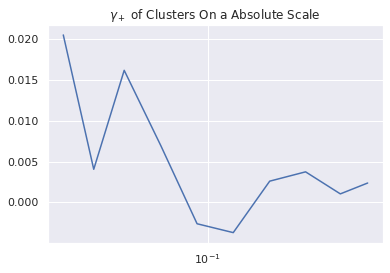

Aggregated xi:
[-2.0512e-02 -9.6745e-01 -1.2552e+01 -9.2751e+00  6.0561e+00  1.5018e+01
 -1.5189e+01 -2.8688e+01 -8.0342e+00 -4.6841e+00]
------------------------------------------------------------------------------
Aggregated meanlogr:
[-4.1936e+00 -9.0699e+02 -2.6353e+03 -3.9039e+03 -5.6254e+03 -7.9560e+03
 -8.7343e+03 -7.8417e+03 -4.3980e+03 -4.1125e+02]
------------------------------------------------------------------------------
Aggregated npairs:
[1.000e+00 2.390e+02 7.760e+02 1.339e+03 2.304e+03 4.043e+03 5.860e+03
 7.683e+03 7.778e+03 1.981e+03]
------------------------------------------------------------------------------
Mean xi:
[-0.0205 -0.004  -0.0162 -0.0069  0.0026  0.0037 -0.0026 -0.0037 -0.001
 -0.0024]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.1936 -3.7949 -3.396  -2.9155 -2.4416 -1.9678 -1.4905 -1.0207 -0.5654
 -0.2076]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

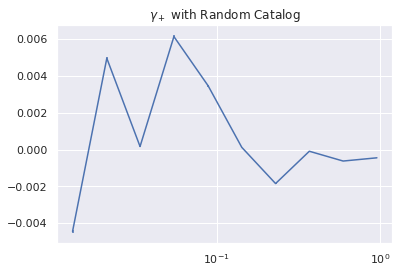

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 6.4598e-05 -7.2041e-05 -2.4146e-06 -8.9143e-05 -5.0345e-05 -1.7618e-06
  2.6826e-05  1.3348e-06  9.0593e-06  6.5046e-06]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

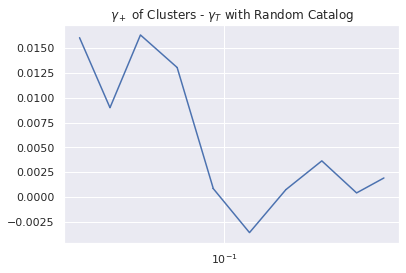

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

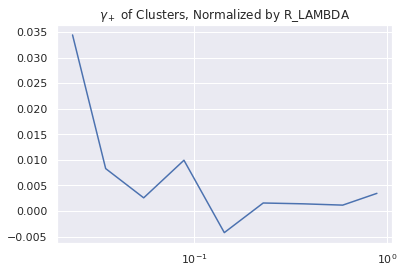

Aggregated xi:
[  0.      -1.4482  -4.4347  -2.6319 -17.6837  13.1299  -7.7366  -9.8146
  -9.6346 -18.0819]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -157.7881 -1794.9566 -2968.7278 -4317.5704 -6032.252
 -7311.345  -7010.9465 -4454.0303  -646.4456]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   42.  534. 1021. 1779. 3101. 4937. 6981. 8377. 5232.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0345 -0.0083 -0.0026 -0.0099  0.0042 -0.0016 -0.0014 -0.0012
 -0.0035]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7569 -3.3613 -2.9077 -2.427  -1.9453 -1.4809 -1.0043 -0.5317
 -0.1236]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)